In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/DONA_DSML_LAB/iris.csv'
iris_data = pd.read_csv(file_path)

In [4]:
iris_data['variety'] = LabelEncoder().fit_transform(iris_data['variety'])

In [5]:
X = iris_data.drop('variety', axis=1)
y = iris_data['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [8]:
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))
input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
result=model.predict(input_data)
classlabels=['Setosa','Versicolor','Virginica']
print(classlabels[result[0]])

Enter sepal length: 6.7
Enter sepal width: 3.1
Enter petal length: 4.4
Enter petal width: 4.1
Virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1   2
Actual               
0          19   0   0
1           0  13   0
2           0   1  12


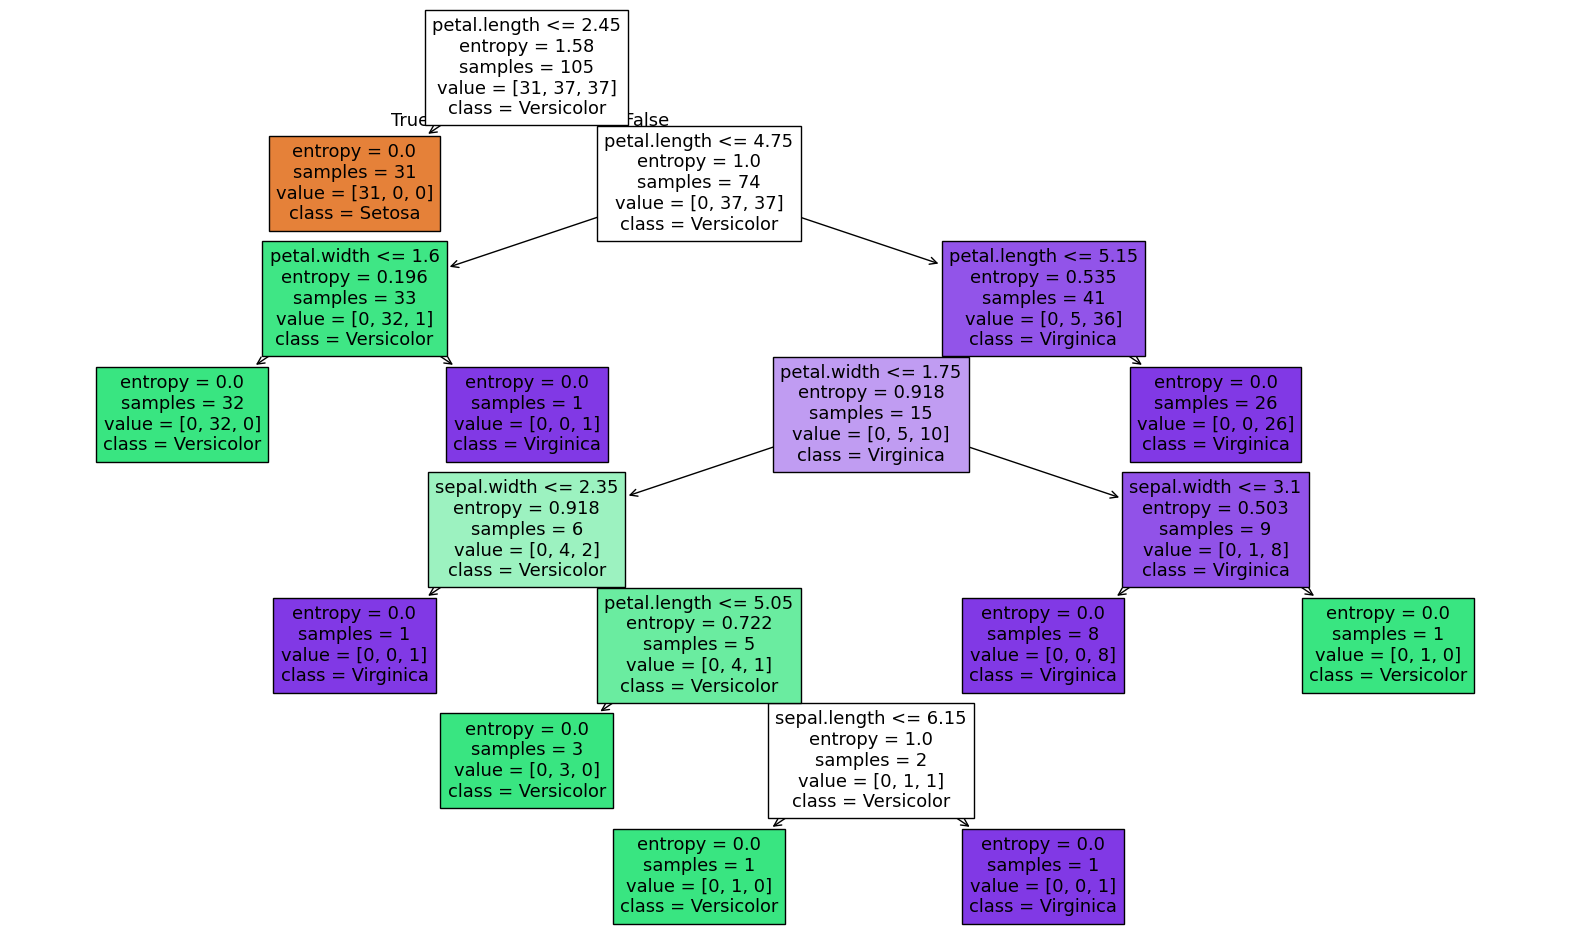

In [12]:
plt.figure(figsize=(20, 12))
plot_tree(model, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.show()